# Credit card fraud detection using pytorch from CSV file creditcard.csv

In [5]:
import torch
from torch import *
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import *
from torch.autograd import *
from torch.optim import *
from torch.nn import *
from torch.nn.functional import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Load the data from CSV file

In [3]:
df = pd.read_csv('creditcard.csv') 

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# define Exploratory Data Analysis (EDA) function

In [6]:
def eda(dataframe):
    print("missing values:  ", dataframe.isnull().sum().values.sum())
    print("dataframe index:  ", dataframe.index)
    print("dataframe types:  ", dataframe.dtypes)
    print("dataframe shape:  ", dataframe.shape)
    print("dataframe describe:  ", dataframe.describe())
    print("dataframe duplicates:  ", dataframe.duplicated().sum())
    print('dataframe columns:  ', dataframe.columns)
    print('dataframe correlation:  ', dataframe.corr())
    print('dataframe skew:  ', dataframe.skew())
    print('dataframe kurtosis:  ', dataframe.kurtosis())
    print('dataframe class distribution:  ', dataframe.groupby('Class').size())
    print('dataframe class distribution:  ', dataframe.groupby('Class').size()/dataframe.shape[0])

In [7]:
eda(df)

missing values:   0
dataframe index:   RangeIndex(start=0, stop=284807, step=1)
dataframe types:   Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
dataframe shape:   (284807, 31)
dataframe describe:                   Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00 

# define plot function

In [8]:
def plot(dataframe):
    dataframe.hist(figsize=(20,20))
    plt.show()

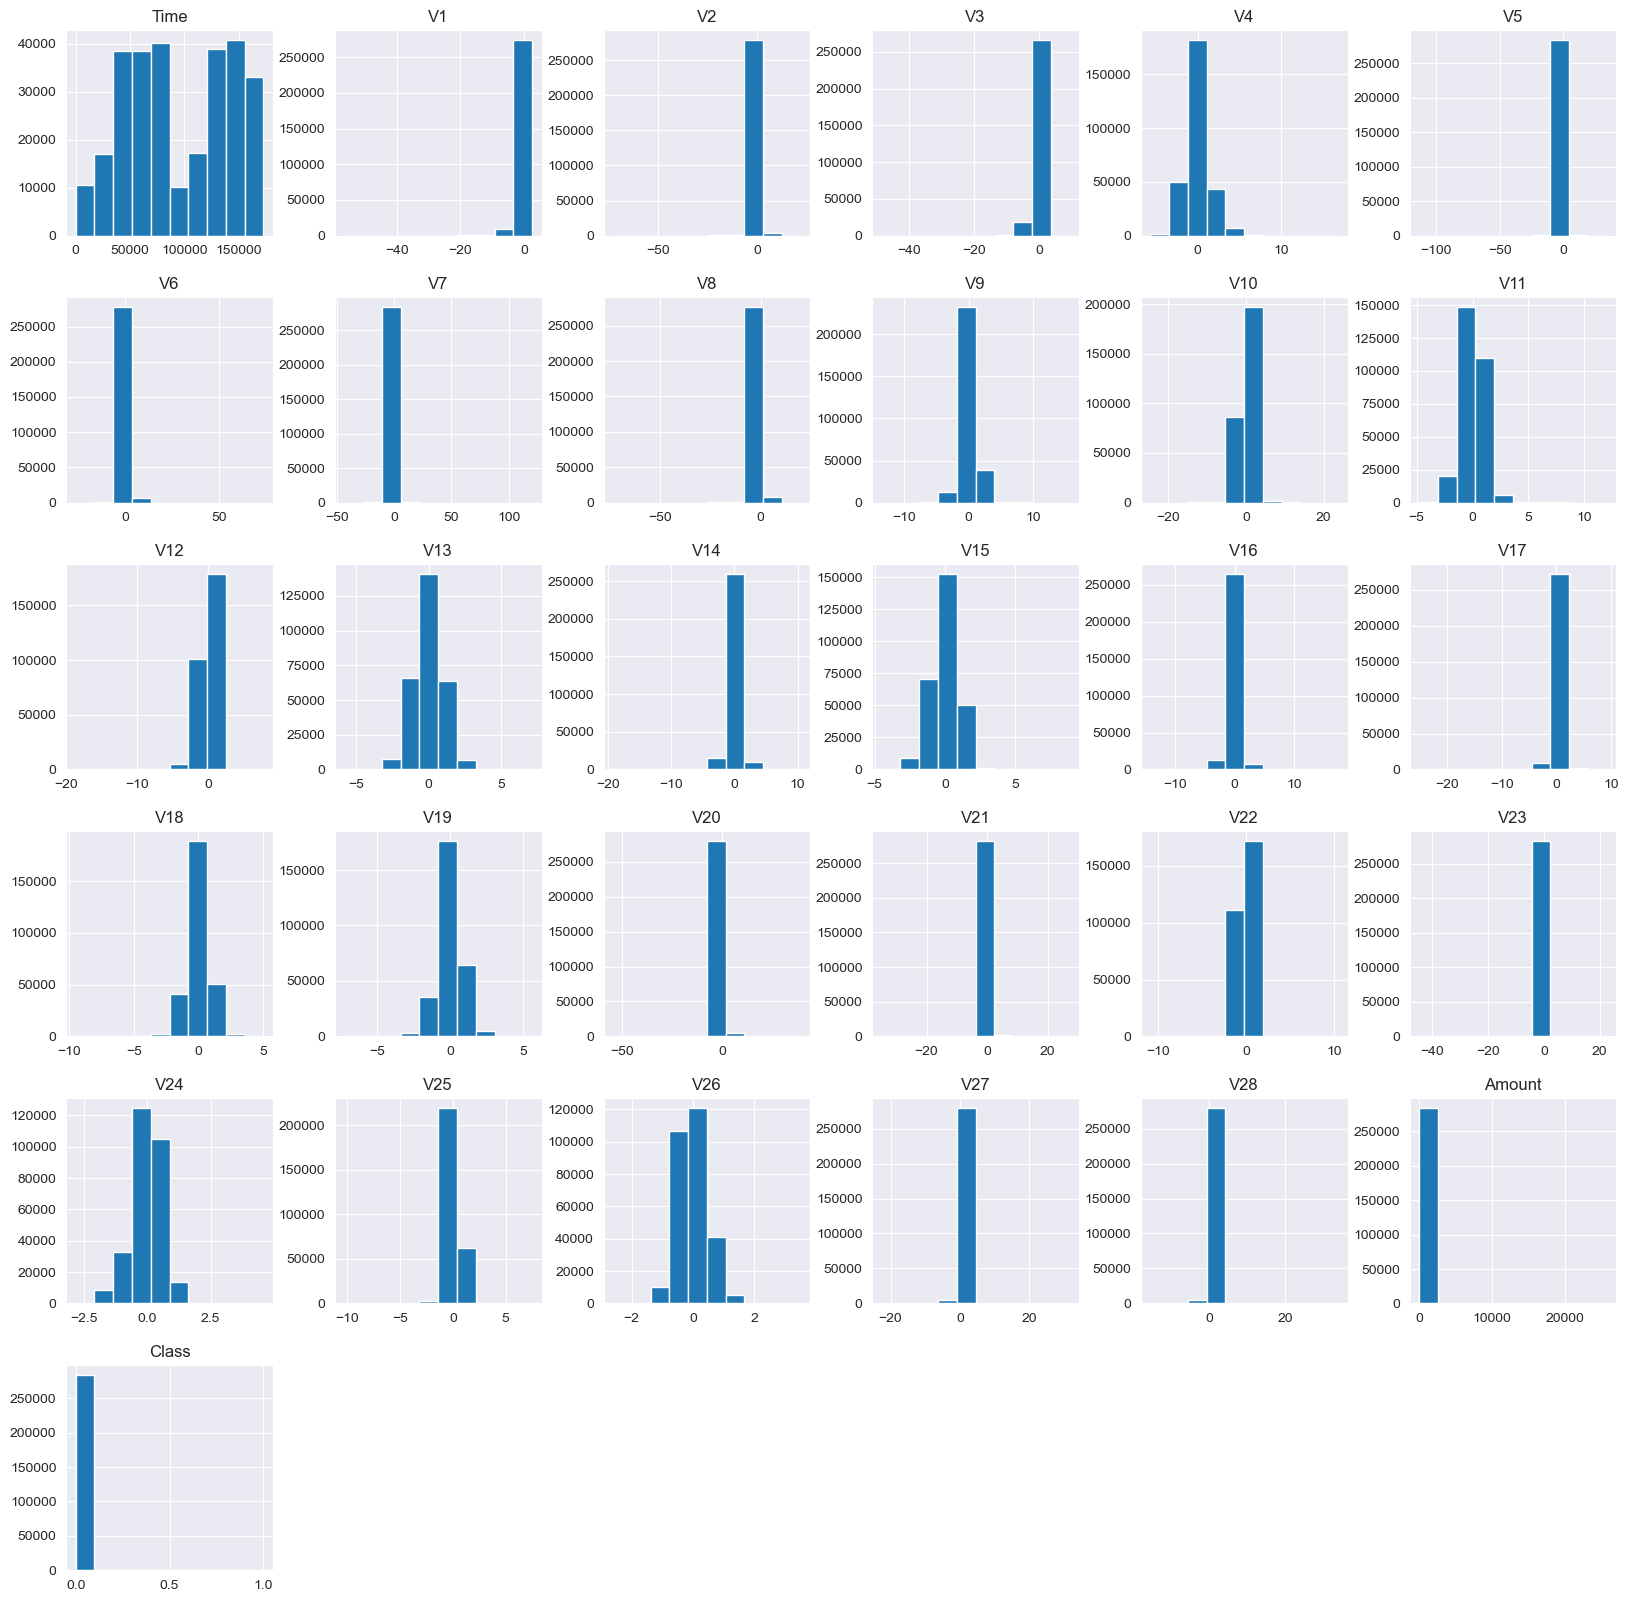

In [9]:
plot(df)

# define plot function use seaborn

In [19]:
def plot_seaborn(dataframe):
    sns.set(style="white")
    sns.set(style="whitegrid", color_codes=True)
    sns.countplot('Class', data=dataframe, palette='Set3')

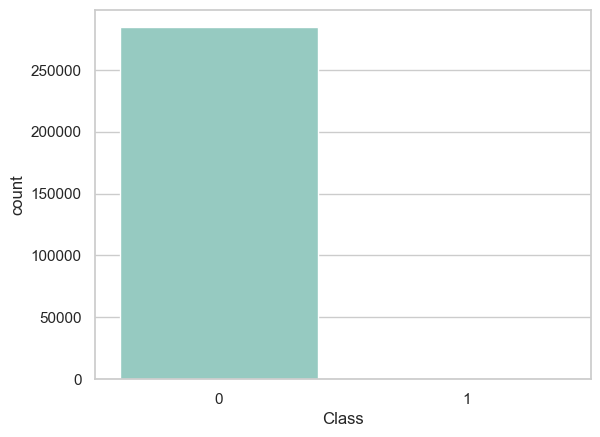

In [20]:
plot_seaborn(df)

# define plot function use seaborn

In [21]:
def plot_seaborn2(dataframe):
    sns.set(style="white")
    sns.set(style="whitegrid", color_codes=True)
    sns.countplot('Class', data=dataframe, palette='Set3')
    plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

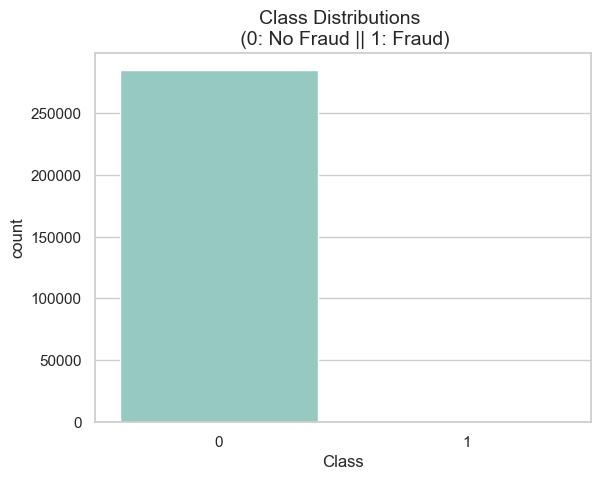

In [22]:
plot_seaborn2(df)

# define model function

In [25]:
def model(dataframe):
    X = dataframe.drop('Class', axis=1)
    y = dataframe['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train.values)
    y_test = torch.LongTensor(y_test.values)
    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = model(df)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

torch.Size([227845, 30])
torch.Size([56962, 30])
torch.Size([227845])
torch.Size([56962])
torch.float32
torch.float32
torch.int64
torch.int64


# define model class

In [33]:
class Model(nn.Module):
    def __init__(self, input_features=30, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [39]:
torch.manual_seed(101)
model = Model()
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 100
losses = []
start_time = time.time()
for i in range(epochs, 0, -1):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    if i%10 == 0:
        print(f'epoch: {i} loss is {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Model(
  (f_connected1): Linear(in_features=30, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)
epoch: 100.0 loss is 0.6154713034629822
epoch: 90.0 loss is 0.04862597584724426
epoch: 80.0 loss is 0.008368994109332561
epoch: 70.0 loss is 0.0072742970660328865
epoch: 60.0 loss is 0.006485542748123407
epoch: 50.0 loss is 0.005955909378826618
epoch: 40.0 loss is 0.005688290577381849
epoch: 30.0 loss is 0.005424571223556995
epoch: 20.0 loss is 0.005164875648915768
epoch: 10.0 loss is 0.004955722484737635
epoch: 0.0 loss is 0.004782998003065586


# define predict function use confusion matrix to evaluate the model

In [60]:
def predict(dataframe):
    with torch.no_grad():
        y_eval = model.forward(X_test)
        loss = criterion(y_eval, y_test)
        print(f'epoch: {i} loss is {loss}')
        y_eval = y_eval.argmax(axis=1)
        print(classification_report(y_test, y_eval))
        print(confusion_matrix(y_test, y_eval))

In [61]:
predict(df)

epoch: 0.0 loss is 0.005078029353171587
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.00      0.00      0.00       103

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

[[56859     0]
 [  103     0]]


# define plot function use seaborn

In [62]:
def plot_seaborn3(dataframe):
    sns.set(style="white")
    sns.set(style="whitegrid", color_codes=True)
    sns.countplot('Class', data=dataframe, palette='Set3')
    plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

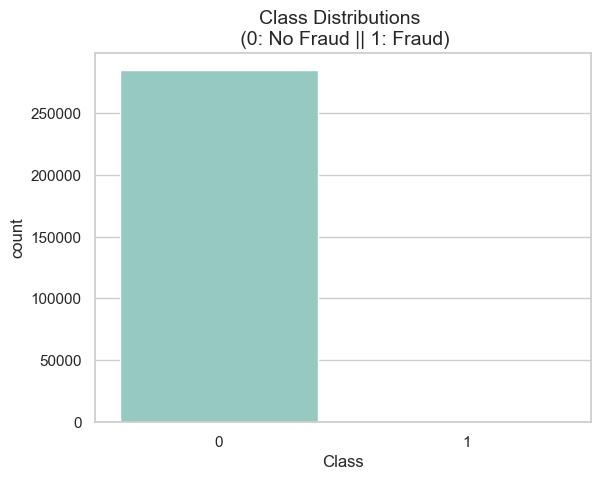

In [63]:
plot_seaborn3(df)

# from the data prediction, we can see that the model is not good enough, we need to improve the model

In [67]:
def model2(dataframe):
    X = dataframe.drop('Class', axis=1)
    y = dataframe['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train.values)
    y_test = torch.LongTensor(y_test.values)
    return X_train, X_test, y_train, y_test


In [68]:
X_train, X_test, y_train, y_test = model2(df)

In [69]:
def model3(dataframe):
    X = dataframe.drop('Class', axis=1)
    y = dataframe['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train.values)
    y_test = torch.LongTensor(y_test.values)
    return X_train, X_test, y_train, y_test

In [70]:
X_train, X_test, y_train, y_test = model3(df)

# define model class

In [71]:
class Model(nn.Module):
    def __init__(self, input_features=30, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.dropout(x, p=0.5)
        x = F.relu(self.f_connected2(x))
        x = F.dropout(x, p=0.5)
        x = self.out(x)
        return x

# define train function

In [72]:
def train(dataframe):
    torch.manual_seed(101)
    model = Model()
    print(model)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    epochs = 100
    losses = []
    start_time = time.time()
    for i in range(epochs, 0, -1):
        y_pred = model.forward(X_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss)
        if i%10 == 0:
            print(f'epoch: {i} loss is {loss}')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model

In [73]:
model = train(df)

Model(
  (f_connected1): Linear(in_features=30, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)
epoch: 100.0 loss is 0.60816490650177
epoch: 90.0 loss is 0.08308153599500656
epoch: 80.0 loss is 0.013922883197665215
epoch: 70.0 loss is 0.010313057340681553
epoch: 60.0 loss is 0.00985142681747675
epoch: 50.0 loss is 0.008378302678465843
epoch: 40.0 loss is 0.008700666949152946
epoch: 30.0 loss is 0.008296655490994453
epoch: 20.0 loss is 0.007589881774038076
epoch: 10.0 loss is 0.0076454333029687405
epoch: 0.0 loss is 0.0073754140175879


# define predict function use confusion matrix to evaluate the model

In [74]:
def predict(dataframe):
    with torch.no_grad():
        y_eval = model.forward(X_test)
        loss = criterion(y_eval, y_test)
        print(f'epoch: {i} loss is {loss}')
        y_eval = y_eval.argmax(axis=1)
        print(classification_report(y_test, y_eval))
        print(confusion_matrix(y_test, y_eval))

In [75]:
predict(df)

epoch: 0.0 loss is 0.007901929318904877
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.00      0.00      0.00       103

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

[[56859     0]
 [  103     0]]


# define plot function use seaborn

In [76]:
def plot_seaborn4(dataframe):
    sns.set(style="white")
    sns.set(style="whitegrid", color_codes=True)
    sns.countplot('Class', data=dataframe, palette='Set3')
    plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

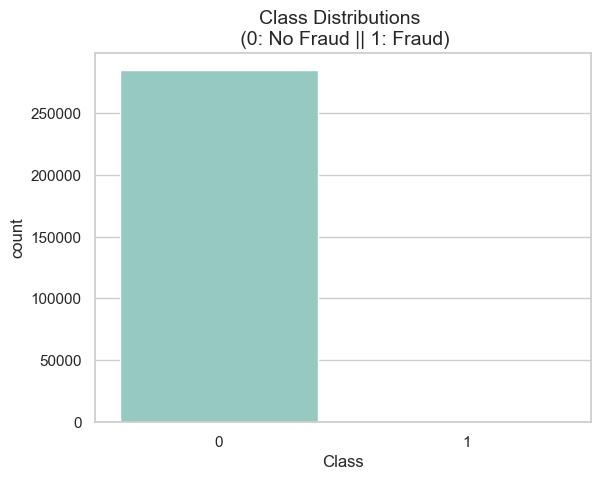

In [77]:
plot_seaborn4(df)

# save and load the model

In [83]:
torch.save(model.state_dict(), 'creditcard.pt')
model = Model()

# define load function

In [84]:
def load(dataframe):
    model.load_state_dict(torch.load('creditcard.pt'))
    model.eval()
    with torch.no_grad():
        y_eval = model.forward(X_test)
        loss = criterion(y_eval, y_test)
        print(f'epoch: {i} loss is {loss}')
        y_eval = y_eval.argmax(axis=1)
        print(classification_report(y_test, y_eval))
        print(confusion_matrix(y_test, y_eval))

In [85]:
load(df)

epoch: 0.0 loss is 0.008220575749874115
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.00      0.00      0.00       103

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

[[56859     0]
 [  103     0]]


# end of the program